In [813]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [814]:
train_data_hdb = pd.read_csv('./data/hdb_train.csv')
test_data_hdb = pd.read_csv('./data/hdb_test.csv')

In [815]:
train_data_hdb = train_data_hdb.drop(['index'],axis=1)
test_data_hdb = test_data_hdb.drop(['index'],axis=1)
print train_data_hdb.shape
print test_data_hdb.shape
print "List of Columns:\n", ", ".join(train_data_hdb.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_hdb.columns), "\n\n"

(759992, 14)
(3766, 13)
List of Columns:
block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, resale_price, storey_range, street_name, town, latitude, longitude, postal_code, floor 


List of Columns:
block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, storey_range, street_name, town, latitude, longitude, postal_code, floor 




In [816]:
train_data_2015 = train_data_hdb[train_data_hdb.month.str.contains('2015')]
train_data_2016 = train_data_hdb[train_data_hdb.month.str.contains('2016')]
train_data_2017 = train_data_hdb[train_data_hdb.month.str.contains('2017')]
train_data_hdb = pd.concat([train_data_2015,train_data_2016,train_data_2017])
train_data_hdb.shape

(52213, 14)

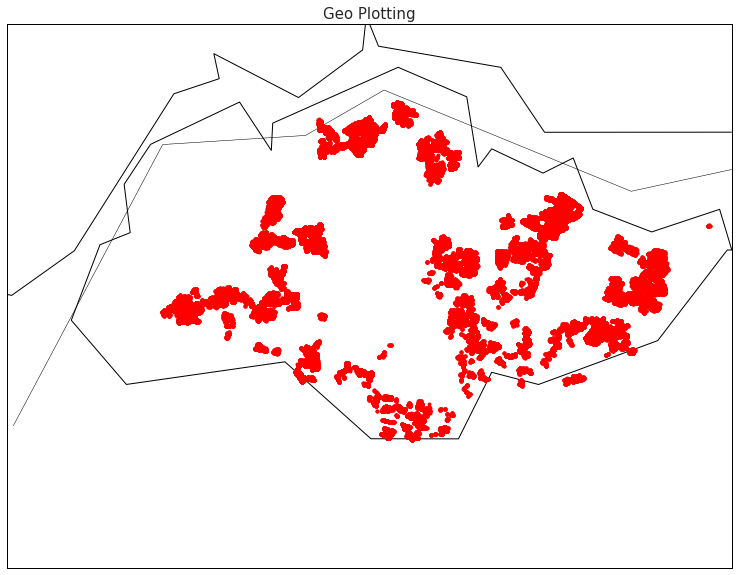

In [817]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
latlong = train_data_hdb[cols]

fig = plt.figure(figsize=(20, 10))
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.3, lon_0=103.8)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

lons = latlong['longitude'].values
lats = latlong['latitude'].values
x,y = m(lons, lats)
m.plot(x, y, 'ro', markersize=4)

plt.title("Geo Plotting")
plt.show()

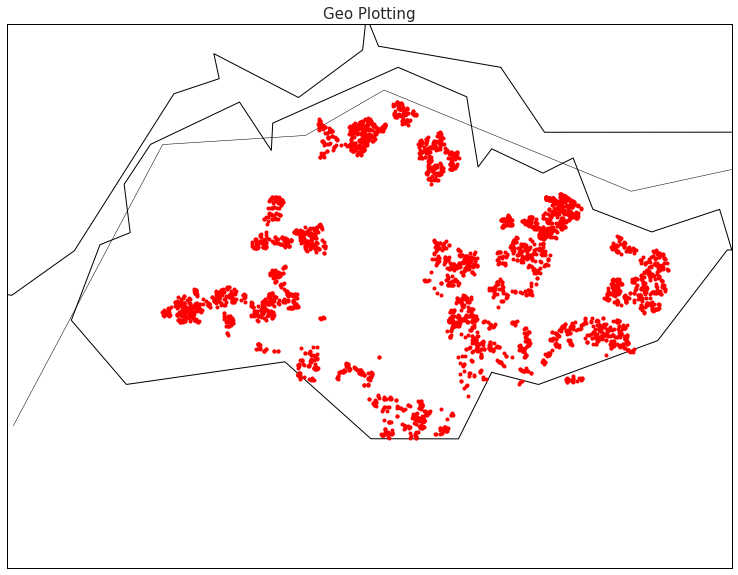

In [818]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(20, 10))

m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.5, lon_0=103)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.drawmapboundary(fill_color='#FFFFFF')

lons = test_data_hdb['longitude'].values
lats = test_data_hdb['latitude'].values
x,y = m(lons, lats)

m.plot(x, y, 'ro', markersize=4)
    
plt.title("Geo Plotting")
plt.show()

In [819]:
train_data_hdb = train_data_hdb.drop(train_data_hdb[(train_data_hdb.latitude>1.4) &\
                                             (train_data_hdb.latitude<1.6) & (train_data_hdb.longitude>103.6) & (train_data_hdb.longitude<103.72)].index)

In [820]:
train_data_hdb.shape

(52213, 14)

In [821]:
train_data_hdb = train_data_hdb.drop(train_data_hdb[train_data_hdb.longitude >103.98].index)

In [822]:
train_data_hdb.shape

(52199, 14)

In [823]:
#train_data_hdb.flat_model.value_counts()
t = train_data_hdb.flat_model.unique()
t.sort()
#t1 = test_data_hdb.flat_model.unique()
#t1.sort()
#print (train_data_hdb['flat_model'].astype('category').cat.codes).unique()
print t
flat_model_dict={}
for i in range(len(t)):
    flat_model_dict[t[i]] = i+1
print flat_model_dict

train_data_hdb['flat_model'] = train_data_hdb.flat_model.apply(lambda x : flat_model_dict[x])
#print train_data_hdb.flat_model.value_counts()
#print test_data_hdb.flat_model.value_counts()
#train_data_hdb.flat_model.unique().sort() == test_data_hdb.flat_model.unique().sort()

['2-ROOM' 'ADJOINED FLAT' 'APARTMENT' 'DBSS' 'IMPROVED'
 'IMPROVED-MAISONETTE' 'MAISONETTE' 'MODEL A' 'MODEL A-MAISONETTE'
 'MODEL A2' 'MULTI GENERATION' 'NEW GENERATION' 'PREMIUM APARTMENT'
 'PREMIUM APARTMENT LOFT' 'PREMIUM MAISONETTE' 'SIMPLIFIED' 'STANDARD'
 'TERRACE' 'TYPE S1' 'TYPE S2']
{'MAISONETTE': 7, 'MODEL A2': 10, 'APARTMENT': 3, 'IMPROVED': 5, 'IMPROVED-MAISONETTE': 6, 'MULTI GENERATION': 11, 'PREMIUM APARTMENT': 13, '2-ROOM': 1, 'TYPE S1': 19, 'NEW GENERATION': 12, 'STANDARD': 17, 'TYPE S2': 20, 'MODEL A': 8, 'MODEL A-MAISONETTE': 9, 'SIMPLIFIED': 16, 'TERRACE': 18, 'PREMIUM APARTMENT LOFT': 14, 'ADJOINED FLAT': 2, 'PREMIUM MAISONETTE': 15, 'DBSS': 4}


In [824]:
t = train_data_hdb.flat_type.unique()
t.sort()
print t
flat_type_dict={}
for i in range(len(t)):
    flat_type_dict[t[i]] = i+1
print flat_type_dict

train_data_hdb['flat_type'] = train_data_hdb.flat_type.apply(lambda x : flat_type_dict[x])

['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
{'3 ROOM': 3, '4 ROOM': 4, '1 ROOM': 1, 'MULTI GENERATION': 7, 'EXECUTIVE': 6, '5 ROOM': 5, '2 ROOM': 2}


In [825]:
t = train_data_hdb.block.unique()
t1 = test_data_hdb.block.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
block_dict={}
for i in range(len(t)):
    block_dict[t[i]] = i+1
#print block_dict

train_data_hdb['block'] = train_data_hdb.block.apply(lambda x : block_dict[x])
test_data_hdb['block'] = test_data_hdb.block.apply(lambda x : block_dict[x])


2179 1380
['1' '10' '100' ..., '99A' '99B' '99C'] ['333' '308A' '577' ..., '829' '398' '827']


In [826]:
train_data_hdb.month = train_data_hdb.month.apply(lambda x : int(x.replace("-","")))
test_data_hdb.month = test_data_hdb.month.apply(lambda x : int(x.replace("-","")))
print train_data_hdb.month.unique()
print test_data_hdb.month.unique()

t = train_data_hdb.month.unique()
t1 = test_data_hdb.month.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
#print t,t1
month_dict={}
for i in range(len(t)):
    month_dict[t[i]] = i+1
#print block_dict

train_data_hdb['month'] = train_data_hdb.month.apply(lambda x : month_dict[x])
test_data_hdb['month'] = test_data_hdb.month.apply(lambda x : month_dict[x])

[201501 201502 201503 201504 201505 201506 201507 201508 201509 201510
 201511 201512 201601 201602 201603 201604 201605 201606 201607 201608
 201609 201610 201611 201612 201701 201702 201703 201704 201705 201706
 201707 201708 201709]
[201710 201711]
35 2


In [827]:
t = train_data_hdb.storey_range.unique()
t1 = test_data_hdb.storey_range.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
storey_dict={}
for i in range(len(t)):
    storey_dict[t[i]] = i+1
#print block_dict

train_data_hdb['storey_range'] = train_data_hdb.storey_range.apply(lambda x : storey_dict[x])
test_data_hdb['storey_range'] = test_data_hdb.storey_range.apply(lambda x : storey_dict[x])

17 15
['01 TO 03' '04 TO 06' '07 TO 09' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27' '28 TO 30' '31 TO 33' '34 TO 36'
 '37 TO 39' '40 TO 42' '43 TO 45' '46 TO 48' '49 TO 51'] ['10 TO 12' '07 TO 09' '04 TO 06' '01 TO 03' '13 TO 15' '16 TO 18'
 '28 TO 30' '25 TO 27' '19 TO 21' '22 TO 24' '34 TO 36' '40 TO 42'
 '31 TO 33' '37 TO 39' '43 TO 45']


In [828]:
print train_data_hdb.town.unique()
print test_data_hdb.town.unique()

print train_data_hdb.street_name.unique()
print test_data_hdb.street_name.unique()

t = train_data_hdb.town.unique()
t1 = test_data_hdb.town.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
town_dict={}
for i in range(len(t)):
    town_dict[t[i]] = i+1
#print block_dict

train_data_hdb['town'] = train_data_hdb.town.apply(lambda x : town_dict[x])
test_data_hdb['town'] = test_data_hdb.town.apply(lambda x : town_dict[x])

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['ANG MO KIO AVE 4' 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5'
 'ANG MO KIO AVE 8' 'ANG MO KIO AVE 1' 'ANG MO KIO AVE 3'
 'ANG MO KIO AVE 6' 'ANG MO KIO ST 21' 'ANG MO KIO ST 52'
 'ANG MO KIO ST 31' 'BEDOK RESERVOIR RD' 'BEDOK STH RD' 'BEDOK NTH ST 3'
 'BEDOK NTH AVE 1' 'BEDOK NTH RD' 'NEW UPP CHANGI RD' 'CHAI CHEE ST'
 'BEDOK NTH ST 1' '

In [829]:
t = train_data_hdb.street_name.unique()
t1 = test_data_hdb.street_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
street_name_dict={}
for i in range(len(t)):
    street_name_dict[t[i]] = i+1
#print block_dict

train_data_hdb['street_name'] = train_data_hdb.street_name.apply(lambda x : street_name_dict[x])
test_data_hdb['street_name'] = test_data_hdb.street_name.apply(lambda x : street_name_dict[x])

522 462
['ADMIRALTY DR' 'ADMIRALTY LINK' 'AH HOOD RD' 'ALJUNIED CRES' 'ALJUNIED RD'
 'ANCHORVALE DR' 'ANCHORVALE LANE' 'ANCHORVALE LINK' 'ANCHORVALE RD'
 'ANG MO KIO AVE 1' 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 2'
 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4' 'ANG MO KIO AVE 5'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 8' 'ANG MO KIO AVE 9'
 'ANG MO KIO ST 11' 'ANG MO KIO ST 21' 'ANG MO KIO ST 31'
 'ANG MO KIO ST 32' 'ANG MO KIO ST 52' 'BAIN ST' 'BALAM RD' 'BANGKIT RD'
 'BEACH RD' 'BEDOK CTRL' 'BEDOK NTH AVE 1' 'BEDOK NTH AVE 2'
 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 4' 'BEDOK NTH RD' 'BEDOK NTH ST 1'
 'BEDOK NTH ST 2' 'BEDOK NTH ST 3' 'BEDOK NTH ST 4' 'BEDOK RESERVOIR RD'
 'BEDOK RESERVOIR VIEW' 'BEDOK STH AVE 1' 'BEDOK STH AVE 2'
 'BEDOK STH AVE 3' 'BEDOK STH RD' 'BENDEMEER RD' 'BEO CRES' 'BISHAN ST 11'
 'BISHAN ST 12' 'BISHAN ST 13' 'BISHAN ST 22' 'BISHAN ST 23' 'BISHAN ST 24'
 'BOON KENG RD' 'BOON LAY AVE' 'BOON LAY DR' 'BOON LAY PL' 'BOON TIONG RD'
 'BRIGHT HILL DR' 'BT BATOK CTRL' 'BT BATOK EAST AVE

In [830]:
train_data_hdb.head(10)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
707779,233,5,3,60.0,1986,1,255000.0,3,14,1,1.375097,103.837619,560174,8
707780,1294,12,3,68.0,1981,1,275000.0,1,11,1,1.373922,103.855621,560541,2
707781,192,12,3,69.0,1980,1,285000.0,1,14,1,1.373549,103.838176,560163,2
707782,1055,12,3,68.0,1979,1,290000.0,1,11,1,1.367761,103.855357,560446,2
707783,1311,12,3,68.0,1980,1,290000.0,3,11,1,1.371626,103.857736,560557,8
707784,1383,12,3,67.0,1980,1,290000.0,3,15,1,1.380201,103.835756,560603,8
707785,1737,12,3,68.0,1980,1,290000.0,1,17,1,1.371137,103.847662,560709,2
707786,823,12,3,68.0,1981,1,293000.0,1,10,1,1.361343,103.851699,560333,2
707787,39,12,3,67.0,1978,1,300000.0,1,14,1,1.370097,103.837688,560109,2
707788,1319,12,3,68.0,1985,1,307500.0,5,13,1,1.369848,103.859404,560564,14


In [831]:
t = train_data_hdb.postal_code.unique()
t1 = test_data_hdb.postal_code.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
postal_dict={}
for i in range(len(t)):
    postal_dict[t[i]] = i+1
#print block_dict

train_data_hdb['postal_code'] = train_data_hdb.postal_code.apply(lambda x : postal_dict[x])
test_data_hdb['postal_code'] = test_data_hdb.postal_code.apply(lambda x : postal_dict[x])


8257 2821
[ 50004  50032  50532 ..., 824637 824642 825195] [560333 561308 560577 ..., 760828 760877 760666]


In [832]:
t = train_data_hdb.latitude.unique()
t1 = test_data_hdb.latitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
lat_dict={}
for i in range(len(t)):
    lat_dict[t[i]] = i+1
#print block_dict

train_data_hdb['latitude'] = train_data_hdb.latitude.apply(lambda x : lat_dict[x])
test_data_hdb['latitude'] = test_data_hdb.latitude.apply(lambda x : lat_dict[x])


8257 2821
[ 1.27037951  1.27091871  1.27140883 ...,  1.45647432  1.45654601
  1.45707122] [ 1.36134256  1.36547952  1.37178733 ...,  1.41519093  1.41390219
  1.41899847]


In [833]:
t = train_data_hdb.longitude.unique()
t1 = test_data_hdb.longitude.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
long_dict={}
for i in range(len(t)):
    long_dict[t[i]] = i+1
#print block_dict

train_data_hdb['longitude'] = train_data_hdb.longitude.apply(lambda x : long_dict[x])
test_data_hdb['longitude'] = test_data_hdb.longitude.apply(lambda x : long_dict[x])


8256 2821
[ 103.68522842  103.68523426  103.68593081 ...,  103.96439861  103.96472179
  103.96491543] [ 103.85169862  103.84408665  103.85585437 ...,  103.83290169  103.83545393
  103.840568  ]


In [834]:
train_data_hdb.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
707779,233,5,3,60.0,1986,1,255000.0,3,14,1,5195,3727,4205,8
707780,1294,12,3,68.0,1981,1,275000.0,1,11,1,5060,4624,4382,2
707781,192,12,3,69.0,1980,1,285000.0,1,14,1,5019,3751,4200,2
707782,1055,12,3,68.0,1979,1,290000.0,1,11,1,4563,4609,4329,2
707783,1311,12,3,68.0,1980,1,290000.0,3,11,1,4857,4742,4397,8


In [835]:
train_data_hdb['resale_price'].describe()

count    5.219900e+04
mean     4.387092e+05
std      1.396803e+05
min      1.750000e+05
25%      3.400000e+05
50%      4.090000e+05
75%      5.000000e+05
max      1.180000e+06
Name: resale_price, dtype: float64


 mu = 438709.22 and sigma = 139678.98



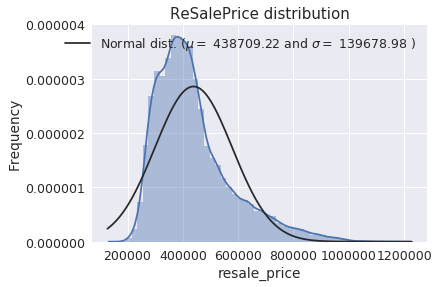

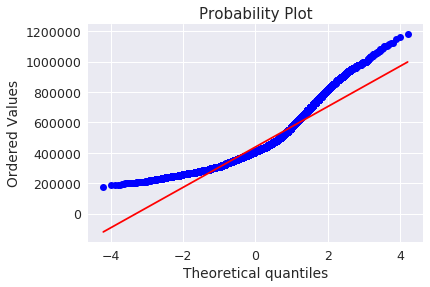

Skewness: 1.257239
Kurtosis: 1.656138


In [836]:
sns.distplot(train_data_hdb['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_hdb['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_hdb['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_hdb['resale_price'].skew())
print("Kurtosis: %f" % train_data_hdb['resale_price'].kurt())

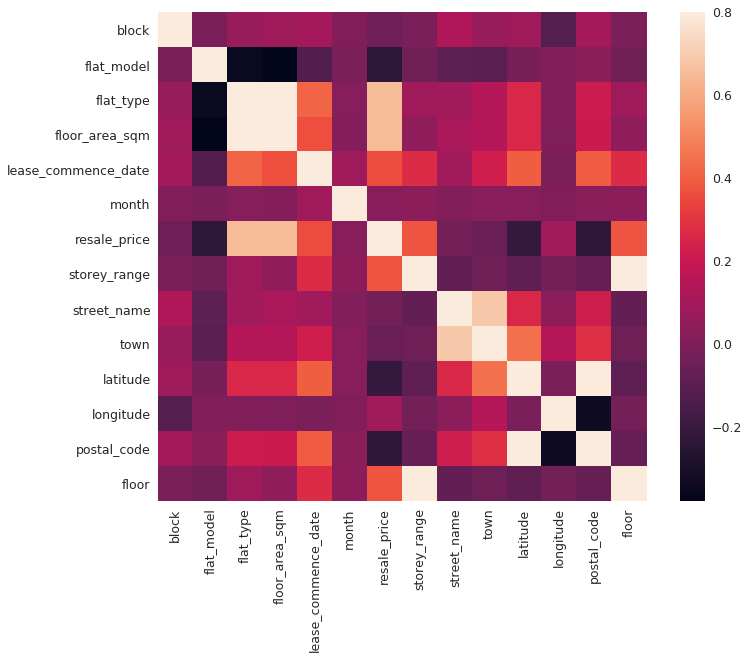

In [837]:
corrmat = train_data_hdb.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [838]:
corrmat

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
block,1.000000,-0.015218,0.071363,0.083129,0.102286,0.005081,-0.044653,-0.012409,0.128738,0.064104,0.090340,-0.119803,0.098035,-0.012409
flat_model,-0.015218,1.000000,-0.347440,-0.379253,-0.126670,-0.011582,-0.236613,-0.040802,-0.093584,-0.102779,-0.016977,0.008656,0.027177,-0.040802
flat_type,0.071363,-0.347440,1.000000,0.945910,0.414942,0.019011,0.651459,0.090078,0.095048,0.150274,0.260901,0.008326,0.213937,0.090078
floor_area_sqm,0.083129,-0.379253,0.945910,1.000000,0.363667,0.015033,0.650275,0.044656,0.118773,0.141725,0.258133,0.001124,0.206870,0.044656
lease_commence_date,0.102286,-0.126670,0.414942,0.363667,1.000000,0.084390,0.357996,0.272385,0.095145,0.227127,0.402913,-0.010899,0.397408,0.272385
month,0.005081,-0.011582,0.019011,0.015033,0.084390,1.000000,0.025255,0.039148,0.012048,0.023608,0.022573,0.004360,0.030671,0.039148
resale_price,-0.044653,-0.236613,0.651459,0.650275,0.357996,0.025255,1.000000,0.377444,-0.032703,-0.057447,-0.216854,0.091011,-0.228549,0.377444
storey_range,-0.012409,-0.040802,0.090078,0.044656,0.272385,0.039148,0.377444,1.000000,-0.078635,-0.051900,-0.088254,-0.032642,-0.067007,1.000000
street_name,0.128738,-0.093584,0.095048,0.118773,0.095145,0.012048,-0.032703,-0.078635,1.000000,0.690756,0.264331,0.039742,0.217120,-0.078635
town,0.064104,-0.102779,0.150274,0.141725,0.227127,0.023608,-0.057447,-0.051900,0.690756,1.000000,0.446123,0.149169,0.279547,-0.051900


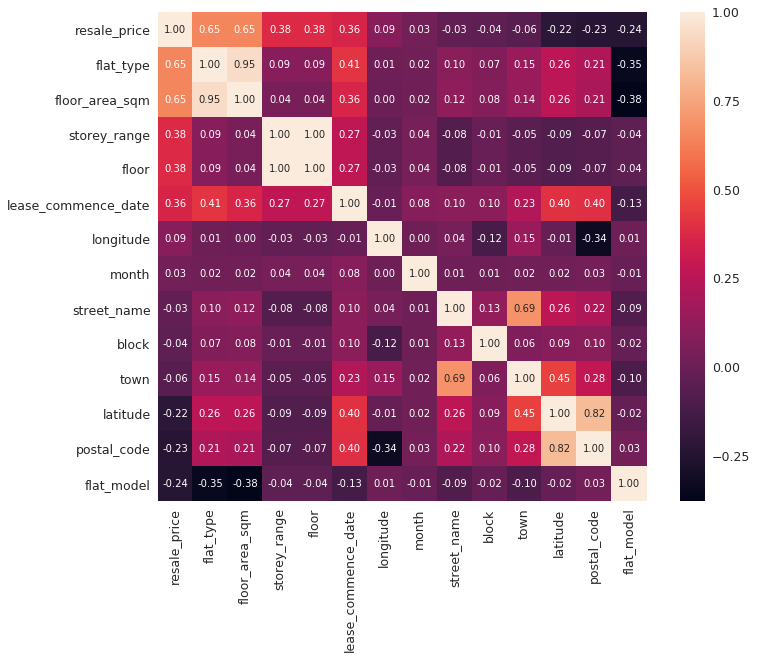

In [839]:
cols = corrmat.nlargest(14, 'resale_price')['resale_price'].index
cm = np.corrcoef(train_data_hdb[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [840]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,resale_price
1,flat_type
2,floor_area_sqm
3,storey_range
4,floor
5,lease_commence_date
6,longitude
7,month
8,street_name
9,block


In [841]:
#y = train_data_hdb.resale_price.unique()
#y.sort()
train_data_hdb[train_data_hdb['resale_price'] == 5000]

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor


In [842]:
train_original = train_data_hdb.copy()
y_original = train_data_hdb.resale_price.values.copy()

In [843]:
skewed_feats = train_data_hdb.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print skewness

                         Skew
floor                1.598629
storey_range         1.598629
resale_price         1.257202
flat_model           0.496268
flat_type            0.298549
floor_area_sqm       0.289685
block                0.174269
lease_commence_date  0.089046
street_name          0.047828
longitude           -0.022289
latitude            -0.024853
postal_code         -0.031949
month               -0.049638
town                -0.206907


In [844]:
#skewness_new= skewness[abs(skewness['Skew']) > 0.75]
#print skewness_new
#from scipy.special import boxcox1p, inv_boxcox1p
#skewed_features = skewness_new.index
#print skewed_features
#for feat in skewed_features:
#    if feat != 'resale_price':
#        #print feat
#        train_data_hdb[feat] = boxcox1p(train_data_hdb[feat], 0.1)


 mu = 26.51 and sigma = 1.08



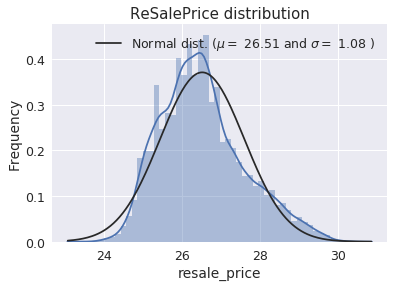

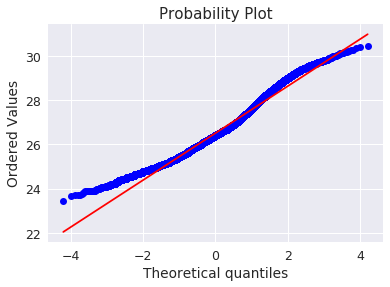

Skewness: 0.553397
Kurtosis: 0.008542


In [845]:
from scipy.special import boxcox1p, inv_boxcox1p
#train_data_hdb["resale_price"] = np.log1p(train_data_hdb["resale_price"])
#train_data_hdb["resale_price"] = np.log(train_data_hdb["resale_price"])
#train_data_hdb["resale_price"] = inv_boxcox1p(train_data_hdb["resale_price"],0.5)
#train_data_hdb["resale_price"] = boxcox1p(train_data_hdb["resale_price"], 0.5)
train_data_hdb["resale_price"] = boxcox1p(train_data_hdb["resale_price"], 0.1)
#tst = train_data_hdb["resale_price"]
#Check the new distribution 
sns.distplot(train_data_hdb["resale_price"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_hdb["resale_price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_hdb["resale_price"], plot=plt)
plt.show()

#y_train = train_data_hdb["resale_price"].values

print("Skewness: %f" % train_data_hdb["resale_price"].skew())
print("Kurtosis: %f" % train_data_hdb["resale_price"].kurt())

In [846]:
train_data_hdb.head(10)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
707779,233,5,3,60.0,1986,1,24.725954,3,14,1,5195,3727,4205,8
707780,1294,12,3,68.0,1981,1,24.989153,1,11,1,5060,4624,4382,2
707781,192,12,3,69.0,1980,1,25.114350,1,14,1,5019,3751,4200,2
707782,1055,12,3,68.0,1979,1,25.175473,1,11,1,4563,4609,4329,2
707783,1311,12,3,68.0,1980,1,25.175473,3,11,1,4857,4742,4397,8
707784,1383,12,3,67.0,1980,1,25.175473,3,15,1,5713,3628,4420,8
707785,1737,12,3,68.0,1980,1,25.175473,1,17,1,4818,4239,4462,2
707786,823,12,3,68.0,1981,1,25.211693,1,10,1,4175,4437,4274,2
707787,39,12,3,67.0,1978,1,25.294926,1,14,1,4729,3730,4168,2
707788,1319,12,3,68.0,1985,1,25.382185,5,13,1,4705,4804,4404,14


In [847]:
#train_data_hdb = train_data_hdb.drop(['block'],axis=1)
#train_data_hdb = train_data_hdb.drop(['street_name'],axis=1)
#train_data_hdb = train_data_hdb.drop(['storey_range'],axis=1)
#train_data_hdb = train_data_hdb.drop(['flat_model'],axis=1)
#train_data_hdb = train_data_hdb.drop(['town'],axis=1)
#train_data_hdb = train_data_hdb.drop(['flat_type'],axis=1)
train_data_hdb.head()


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
707779,233,5,3,60.0,1986,1,24.725954,3,14,1,5195,3727,4205,8
707780,1294,12,3,68.0,1981,1,24.989153,1,11,1,5060,4624,4382,2
707781,192,12,3,69.0,1980,1,25.114350,1,14,1,5019,3751,4200,2
707782,1055,12,3,68.0,1979,1,25.175473,1,11,1,4563,4609,4329,2
707783,1311,12,3,68.0,1980,1,25.175473,3,11,1,4857,4742,4397,8


In [848]:
trainY = train_data_hdb.resale_price.values
print trainY
train_data_hdb = train_data_hdb.drop(['resale_price'],axis=1)
train_data_hdb.head()

[ 24.72595422  24.98915283  25.11435038 ...,  27.73250696  27.88382422
  28.41579862]


,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
707779,233,5,3,60.0,1986,1,3,14,1,5195,3727,4205,8
707780,1294,12,3,68.0,1981,1,1,11,1,5060,4624,4382,2
707781,192,12,3,69.0,1980,1,1,14,1,5019,3751,4200,2
707782,1055,12,3,68.0,1979,1,1,11,1,4563,4609,4329,2
707783,1311,12,3,68.0,1980,1,3,11,1,4857,4742,4397,8


In [849]:
train_data_hdb.shape

(52199, 13)

In [850]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
#import lightgbm as lgb
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.kernel_ridge import KernelRidge
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import RobustScaler

In [851]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=15, 
                             min_child_weight=1.5, n_estimators=2000,
                             reg_alpha=0.8, reg_lambda=0.7,
                             subsample=0.2, silent=1,
                             random_state =13)

In [852]:
np.random.seed(13)
test_size = .1
X_train, X_test, y_train, y_test = train_test_split(train_data_hdb, trainY, test_size = test_size)
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(46979, 13) (46979,) (5220, 13) (5220,)


In [853]:
n_folds = 10
kf = KFold(n_folds, shuffle=True, random_state=13).get_n_splits(X_train.values)
map_metrics= -cross_val_score(model_xgb, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf)
#rmse= np.sqrt(-cross_val_score(model_xgb, train_data_hdb.values, trainY, scoring="neg_mean_squared_error", cv = kf))
print map_metrics


[ 0.13818661  0.13924313  0.13846835  0.13884577  0.14065842  0.13929241
  0.14114938  0.14013159  0.13992201  0.13829966]


In [854]:
#traindf, testdf = train_test_split(X_train, test_size = 0.3)
#xgb.fit(X_train,y_train)



In [855]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=15, min_child_weight=1.5, missing=None,
       n_estimators=2000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=13, reg_alpha=0.8, reg_lambda=0.7, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.2)

In [856]:
pred_train = model_xgb.predict(X_train)

In [857]:
pred_train

array([ 26.89631271,  28.00124359,  27.52383804, ...,  26.71886063,
        25.78404617,  24.81196404], dtype=float32)

In [858]:
y_train

array([ 26.87613436,  27.82815827,  27.47993353, ...,  26.83628951,
        25.68655376,  24.85978878])

In [859]:
np.mean(np.abs((y_train - pred_train) / y_train)) * 100

0.40281509541919142

In [860]:
pred_test = model_xgb.predict(X_test)

In [861]:
np.mean(np.abs((y_test - pred_test) / y_test)) * 100

0.52136225739054631

In [862]:
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.1, random_state=1))
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.1, l1_ratio=.9, random_state=3))
#KRR = KernelRidge(alpha=0.2, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [863]:
def mse_cv(model):
    kfold = KFold(5, shuffle=True, random_state=13).get_n_splits(X_train.values)
    metrics= -cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kfold)
    return(metrics)

In [864]:
#print("lasso",mse_cv(lasso))

In [865]:
#print("ENet",mse_cv(ENet))

In [866]:
#print("KRR",mse_cv(KRR))

In [867]:
#print("GBoost",mse_cv(GBoost))
GBoost.fit(X_train,y_train)
pred_Gboost = GBoost.predict(X_train)

In [868]:
np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

0.29402938380223098

In [869]:
#lasso.fit(X_train,y_train)
#ENet.fit(X_train,y_train)
#pred_lasso = lasso.predict(X_train)
#pred_ENet = ENet.predict(X_train)

In [870]:
#np.mean(np.abs((y_train - pred_lasso) / y_train)) * 100

In [871]:
#np.mean(np.abs((y_train - pred_ENet) / y_train)) * 100

In [872]:
#GBoost.fit(X_train,y_train)
#pred_Gboost = GBoost.predict(X_train)
#np.mean(np.abs((y_train - pred_Gboost) / y_train)) * 100

In [873]:
pred_test_gboost = GBoost.predict(X_test)
np.mean(np.abs((y_test - pred_test_gboost) / y_test)) * 100

0.50789377135003155

In [874]:
np.random.seed(13)
test_size = .1
#train_data = pd.read_csv('./data/hdb_train.csv')
#train_data = train_data.drop(['resale_price'],axis=1)
#train_data = train_data.drop(train_data[(train_data.latitude>1.4) &\
#                                             (train_data.latitude<1.6) & (train_data.longitude>103.6) & (train_data.longitude<103.72)].index)
#train_data = train_data.drop(train_data[train_data.longitude >103.98].index)
#train_data_2016 = train_data[train_data.month.str.contains('2016')]
#train_data_2017 = train_data[train_data.month.str.contains('2017')]
#train_data = pd.concat([train_data_2016,train_data_2017])
#train_dataY = train_data.resale_price.values

#train_data = train_data.drop(['resale_price'],axis=1)
print train_original.head()
#y_original = train_original.resale_price.values
print y_original
train_original = train_original.drop(['resale_price'],axis=1)
X_tr, X_te, y_tr, y_te = train_test_split(train_original, y_original, test_size = test_size)
print X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

        block  flat_model  flat_type  floor_area_sqm  lease_commence_date  \
707779    233           5          3            60.0                 1986   
707780   1294          12          3            68.0                 1981   
707781    192          12          3            69.0                 1980   
707782   1055          12          3            68.0                 1979   
707783   1311          12          3            68.0                 1980   

        month  resale_price  storey_range  street_name  town  latitude  \
707779      1      255000.0             3           14     1      5195   
707780      1      275000.0             1           11     1      5060   
707781      1      285000.0             1           14     1      5019   
707782      1      290000.0             1           11     1      4563   
707783      1      290000.0             3           11     1      4857   

        longitude  postal_code  floor  
707779       3727         4205      8  
707780      

In [875]:
pred_inv = inv_boxcox1p(pred_train, 0.1)

In [876]:
print pred_inv
print y_tr

[ 467550.6875   628025.625    553441.5     ...,  445544.375    344265.21875
  261386.75   ]
[ 465000.  600000.  547000. ...,  460000.  335000.  265000.]


In [877]:
np.mean(np.abs((y_tr - pred_inv) / y_tr)) * 100

2.927412693219773

In [878]:
pred_test_inv =inv_boxcox1p(pred_test, 0.1)
np.mean(np.abs((y_te - pred_test_inv) / y_te)) * 100

3.7900756207315194

In [879]:
pred_inv_gboost = inv_boxcox1p(pred_Gboost, 0.1)
print pred_inv_gboost

[ 464995.06046341  624447.60891998  542564.35848839 ...,  453156.1556023
  339773.63320106  263446.93782589]


In [880]:
np.mean(np.abs((y_tr - pred_inv_gboost) / y_tr)) * 100

2.1374442283314834

In [881]:
pred_test_binv =inv_boxcox1p(pred_test_gboost, 0.1)
np.mean(np.abs((y_te - pred_test_binv) / y_te)) * 100

3.690602270221651

In [882]:
ensemble_train = 0.3*pred_inv + 0.7*pred_inv_gboost
np.mean(np.abs((y_tr - ensemble_train) / y_tr)) * 100

2.322580003075938

In [886]:
ensemble_test = 0.3*pred_test_inv + 0.7*pred_test_binv
np.mean(np.abs((y_te - ensemble_test) / y_te)) * 100

3.6590866136734479

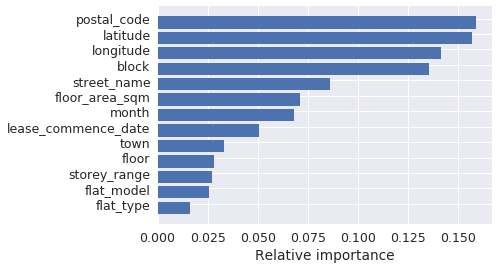

In [887]:
indices = np.argsort(model_xgb.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), model_xgb.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

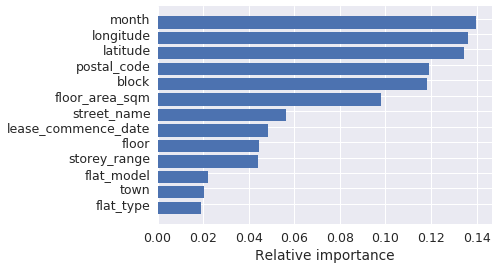

In [888]:
indices = np.argsort(GBoost.feature_importances_)

# plot as bar chart
names=list(X_train)
plt.barh(np.arange(len(names)), GBoost.feature_importances_[indices])

plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])

_ = plt.xlabel('Relative importance')

In [889]:
test_data_hdb.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,823,NEW GENERATION,3 ROOM,68.0,1981,34,4,10,1,4175,4437,4274,11
1,734,MODEL A,3 ROOM,70.0,2012,34,3,10,1,4397,4043,4474,8
2,1341,NEW GENERATION,3 ROOM,67.0,1980,34,3,11,1,4871,4635,4412,8
3,1105,NEW GENERATION,3 ROOM,67.0,1979,34,3,11,1,4300,4693,4350,8
4,1051,NEW GENERATION,3 ROOM,67.0,1979,34,3,11,1,4482,4623,4327,8


In [890]:
test_data_hdb['flat_model'] = test_data_hdb.flat_model.apply(lambda x : flat_model_dict[x])


In [891]:
test_data_hdb['flat_type'] = test_data_hdb.flat_type.apply(lambda x : flat_type_dict[x])
test_data_hdb.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,823,12,3,68.0,1981,34,4,10,1,4175,4437,4274,11
1,734,8,3,70.0,2012,34,3,10,1,4397,4043,4474,8
2,1341,12,3,67.0,1980,34,3,11,1,4871,4635,4412,8
3,1105,12,3,67.0,1979,34,3,11,1,4300,4693,4350,8
4,1051,12,3,67.0,1979,34,3,11,1,4482,4623,4327,8


In [892]:
test_data_hdb.shape

(3766, 13)

In [893]:
test_y_xgb = model_xgb.predict(test_data_hdb)
test_y_gboost = GBoost.predict(test_data_hdb)
print test_y_xgb
print test_y_gboost

[ 25.5287056   26.55868149  25.22921181 ...,  28.07416153  27.82377625
  28.12159157]
[ 25.45956386  26.60335003  25.18052565 ...,  28.19226169  28.05661099
  28.41440737]


In [894]:
test_y_xgb_inv = inv_boxcox1p(test_y_xgb, 0.1)
test_y_gboost_inv = inv_boxcox1p(test_y_gboost, 0.1)
print test_y_xgb_inv
print test_y_gboost_inv

[ 320473.75     426485.40625  294460.96875 ...,  640181.       599305.25
  648200.75   ]
[ 314291.41270321  431725.14381788  290416.80704993 ...,  660317.97068547
  637236.18382685  699746.53310583]


In [895]:
ensemble_y = 0.3*test_y_xgb_inv + 0.7*test_y_gboost_inv
print ensemble_y

[ 316146.11389225  430153.22567252  291630.06180995 ...,  654276.89197983
  625856.90680379  684282.80754908]


In [896]:
sub_1 = pd.Series(ensemble_y, name='price')
sub_1.to_csv("./data/submission-7.csv", header=['price'])

In [897]:
sub_2 = pd.Series(test_y_xgb_inv, name='price')
sub_2.to_csv("./data/submission-8.csv", header=['price'])

In [898]:
sub_3= pd.Series(test_y_gboost_inv, name='price')
sub_3.to_csv("./data/submission-9.csv", header=['price'])

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
'max_depth': [6,10,14],
'min_samples_leaf': [3, 5, 9, 17],
 'max_features': [1.0, 'log2', 'auto', 'sqrt'] 
}

est = GradientBoostingRegressor(n_estimators=300)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X_train,y_train)

# best hyperparameter setting
gs_cv.best_params_

/home/thebeast/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/thebeast/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
